In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
X = df.iloc[:,0:8]
y = df.iloc[:,8]
X_std = (X - np.mean(X, axis = 0)) / np.std(X, axis = 0)

In [6]:
cov_matrix = np.cov(X_std, rowvar=False)
cov_matrix

array([[ 1.00130378,  0.12962746,  0.14146618, -0.08177826, -0.07363049,
         0.01770615, -0.03356638,  0.54505093],
       [ 0.12962746,  1.00130378,  0.15278853,  0.05740263,  0.33178913,
         0.2213593 ,  0.13751636,  0.26385788],
       [ 0.14146618,  0.15278853,  1.00130378,  0.2076409 ,  0.08904933,
         0.2821727 ,  0.04131875,  0.23984024],
       [-0.08177826,  0.05740263,  0.2076409 ,  1.00130378,  0.43735204,
         0.39308503,  0.18416737, -0.11411885],
       [-0.07363049,  0.33178913,  0.08904933,  0.43735204,  1.00130378,
         0.19811702,  0.18531222, -0.04221793],
       [ 0.01770615,  0.2213593 ,  0.2821727 ,  0.39308503,  0.19811702,
         1.00130378,  0.14083033,  0.03628912],
       [-0.03356638,  0.13751636,  0.04131875,  0.18416737,  0.18531222,
         0.14083033,  1.00130378,  0.03360507],
       [ 0.54505093,  0.26385788,  0.23984024, -0.11411885, -0.04221793,
         0.03628912,  0.03360507,  1.00130378]])

In [23]:
import time
start_time = time.time()

In [24]:
eigenval, eigenvec = np.linalg.eig(cov_matrix)
eigenval

array([ 2.09711056,  1.73346726,  0.42036353,  0.40498938,  0.68351839,
        0.76333832,  0.87667054,  1.03097228])

In [25]:
eigenvec

array([[ 0.1284321 ,  0.59378583,  0.58879003,  0.11784098, -0.19359817,
         0.47560573, -0.08069115,  0.01308692],
       [ 0.39308257,  0.17402908,  0.06015291,  0.45035526, -0.09416176,
        -0.46632804,  0.40432871, -0.46792282],
       [ 0.36000261,  0.18389207,  0.19211793, -0.01129554,  0.6341159 ,
        -0.32795306, -0.05598649,  0.53549442],
       [ 0.43982428, -0.33196534, -0.28221253,  0.5662838 , -0.00958944,
         0.48786206, -0.03797608,  0.2376738 ],
       [ 0.43502617, -0.25078106,  0.13200992, -0.54862138,  0.27065061,
         0.34693481,  0.34994376, -0.33670893],
       [ 0.45194134, -0.1009598 ,  0.03536644, -0.34151764, -0.68537218,
        -0.25320376, -0.05364595,  0.36186463],
       [ 0.27061144, -0.122069  ,  0.08609107, -0.00825873,  0.08578409,
        -0.11981049, -0.8336801 , -0.43318905],
       [ 0.19802707,  0.62058853, -0.71208542, -0.21166198,  0.03335717,
         0.10928996, -0.0712006 , -0.07524755]])

In [26]:
eig_pairs = [(eigenval[index], eigenvec[:,index]) for index in range(len(eigenval))]
eig_pairs.sort()
eig_pairs.reverse()
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenval))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenval))]
eigvalues_sort

[2.0971105579945224,
 1.7334672594471274,
 1.0309722810083821,
 0.87667054190947979,
 0.76333831564967281,
 0.68351838584472846,
 0.42036352804956761,
 0.40498937781489824]

In [27]:
print('----%s seconds----' %(time.time() - start_time))

----3.5884625911712646 seconds----


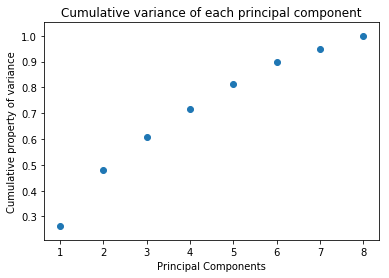

In [22]:
var_sum = np.cumsum(eigvalues_sort) / sum(eigvalues_sort)
num = range(1, len(eigvalues_sort) + 1)
plt.title('Cumulative variance of each principal component')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative property of variance')
plt.scatter(num, var_sum)
plt.show()

In [13]:
var_sum

array([ 0.26179749,  0.47819876,  0.60690249,  0.71634362,  0.81163667,
        0.89696522,  0.94944224,  1.        ])

In [14]:
eigvectors_sort[0:2]

[array([ 0.1284321 ,  0.39308257,  0.36000261,  0.43982428,  0.43502617,
         0.45194134,  0.27061144,  0.19802707]),
 array([ 0.59378583,  0.17402908,  0.18389207, -0.33196534, -0.25078106,
        -0.1009598 , -0.122069  ,  0.62058853])]

In [15]:
#Reduced from 8x8 to 8x2
reduce = np.array(eigvectors_sort[0:2]).transpose()
Project_2D = np.dot(X_std, reduce)
reduce

array([[ 0.1284321 ,  0.59378583],
       [ 0.39308257,  0.17402908],
       [ 0.36000261,  0.18389207],
       [ 0.43982428, -0.33196534],
       [ 0.43502617, -0.25078106],
       [ 0.45194134, -0.1009598 ],
       [ 0.27061144, -0.122069  ],
       [ 0.19802707,  0.62058853]])

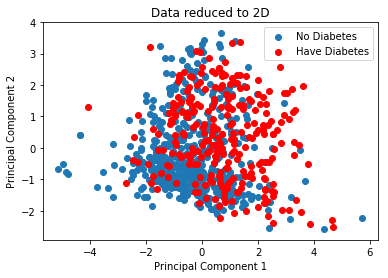

In [16]:
neg = plt.scatter(Project_2D[:,0][y == 0], Project_2D[:,1][y == 0])
pos = plt.scatter(Project_2D[:,0][y == 1], Project_2D[:,1][y == 1], color = "red")
plt.title('Data reduced to 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend([neg, pos], ['No Diabetes', 'Have Diabetes'])
plt.show()